In [1]:
import os
import sys
import importlib
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

In [2]:
project_path = 'C:\\Users\\danny\\Documents_Local\\Caltech_2023-2024\\CS101'

def join_path(relative_path: str) -> str:
    return os.path.join(project_path, relative_path)

def pickle_load(relative_path: str):  # -> pickled_file_contents
    return pickle.load(open(join_path(relative_path), 'rb'))

def pickle_save(obj: object, relative_path: str) -> None:
    pickle.dump(obj, open(join_path(relative_path), 'wb'))

In [3]:
sys.path.append(join_path('EMIT-ECOSTRESS\\modules'))
import datasets.Datasets
import models.Feedforward
import utils.train
import utils.eval

In [4]:
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'
device

'cuda'

In [5]:
base_data_path = 'Data\\Dataset\\Splits'
log_file_path = join_path(r'Miscellaneous\small_nn_benchmark_log.txt')

# load data

emit_train = pickle_load(
    os.path.join(base_data_path, 'reflectance_train_pca244.pkl')
)
emit_val = pickle_load(
    os.path.join(base_data_path, 'reflectance_val_pca244.pkl')
)

elev_train = pickle_load(
    os.path.join(base_data_path, 'elevation_train.pkl')
)
elev_val = pickle_load(os.path.join(base_data_path, 'elevation_val.pkl'))

elev_train = (
    (
        elev_train - np.mean(np.concatenate([elev_train, elev_val], axis=1))
    ) / 
    np.std(np.concatenate([elev_train, elev_val], axis=1))
)
elev_val = (
    (
        elev_val - np.mean(np.concatenate([elev_train, elev_val], axis=1))
    ) / 
    np.std(np.concatenate([elev_train, elev_val], axis=1))
)
eco_train = pickle_load(os.path.join(base_data_path, 'temp_train.pkl'))
eco_val = pickle_load(os.path.join(base_data_path, 'temp_val.pkl'))

In [15]:
benchmark_combos = [
    # (0, 0), (0, 1),
    # (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 8),
    # (0, 10), (0, 12), (0, 16), (0, 24), (0, 32), (0, 48), (0, 64),
    # (0, 96), (0, 128), (0, 244),
    # (1, 2), (1, 3), (1, 4), (1, 8), (1, 16), (1, 32), (1, 48), (1, 64),
    # (2, 2), (2, 4), (2, 8), (2, 16), (2, 32), (2, 48),
    # (3, 2), (3, 4), (3, 8), (3, 16), (3, 32), (3, 48),
    # (4, 2), (4, 3), (4, 4), (4, 8), (4, 16), (4, 32), (4, 48),
    # (5, 2), (5, 3), (5, 4), (5, 8), (5, 16), (5, 32), (5, 48),
    # (6, 2), (6, 4), (6, 8), (6, 16), (6, 32),
    # (7, 2), (7, 4), (7, 8), (7, 16),
    # (8, 2), (8, 4), (8, 8), (8, 16),
    # (9, 2), (9, 4), (9, 8),
    # (10, 2), (10, 4), (10, 8),
    # (11, 2), (11, 4), (11, 6),
    # (12, 2), (12, 3), (12, 4), (12, 5), (12, 6),
    # (13, 1), (13, 2), (13, 3), (13, 4), (13, 5),
    # (14, 1), (14, 2), (14, 3), (14, 4), (14, 5),
    # (15, 1), (15, 2), (15, 3), (15, 4), (15, 5),
    # (16, 1), (16, 2), (16, 3), (16, 4), (16, 5),
    # (17, 1), (17, 2), (17, 3), (17, 4), (17, 5),
    # (18, 1), (18, 2), (18, 3), (18, 4), (18, 5),
    # (19, 1), (19, 2), (19, 3), (19, 4), (19, 5),
    # (20, 1), (20, 2), (20, 3), (20, 4), (20, 5),
    # (21, 1), (21, 2), (21, 3), (21, 4), (21, 5),
    # (22, 1), (22, 2), (22, 3), (22, 4), (22, 5),
    # (23, 1), (23, 2), (23, 3), (23, 4), (23, 5),
    # (24, 1), (24, 2), (24, 3), (24, 4), (24, 5),
    # (32, 1), (32, 2), (32, 3), (32, 4), (32, 5),
]

benchmark_combos = [
    (6, 4),
    (6, 8),
    (10, 2),
    (10, 4),
    (10, 8),
    (12, 2),
    (12, 3),
    (12, 6),
    (14, 3),
    (16, 2),
    (16, 3),
    (16, 4),
    (18, 3),
    (18, 5),
    (20, 2),
    (22, 2),
]

len(benchmark_combos)

16

In [13]:
benchmark_combos = [(22, 2)]

radius=6, n_components=4
 PatchToPixelModel(
  (linear1): Linear(in_features=845, out_features=32, bias=True)
  (layernorm1): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
  (linear2): Linear(in_features=32, out_features=16, bias=True)
  (layernorm2): LayerNorm((16,), eps=1e-05, elementwise_affine=True)
  (linear3): Linear(in_features=16, out_features=8, bias=True)
  (layernorm3): LayerNorm((8,), eps=1e-05, elementwise_affine=True)
  (linear_output): Linear(in_features=8, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  1.0351,  3.0705   	 Val (RMSE, K):  1.1086,  2.9716   	LR:  0.001	Time: 47.7
Epoch 001:     Train (RMSE, K):  0.44794,  1.3287   	 Val (RMSE, K):  0.69503,   1.863   	LR:  0.001	Time: 50.1


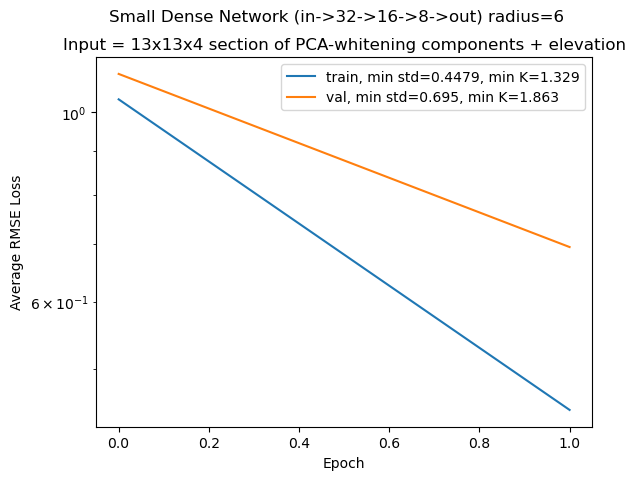

radius=6, n_components=8
 PatchToPixelModel(
  (linear1): Linear(in_features=1521, out_features=32, bias=True)
  (layernorm1): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
  (linear2): Linear(in_features=32, out_features=16, bias=True)
  (layernorm2): LayerNorm((16,), eps=1e-05, elementwise_affine=True)
  (linear3): Linear(in_features=16, out_features=8, bias=True)
  (layernorm3): LayerNorm((8,), eps=1e-05, elementwise_affine=True)
  (linear_output): Linear(in_features=8, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  1.1436,   3.392   	 Val (RMSE, K):  1.0857,  2.9101   	LR:  0.001	Time: 41.8
Epoch 001:     Train (RMSE, K):  0.40464,  1.2003   	 Val (RMSE, K):  1.0606,   2.843   	LR:  0.001	Time: 54.5


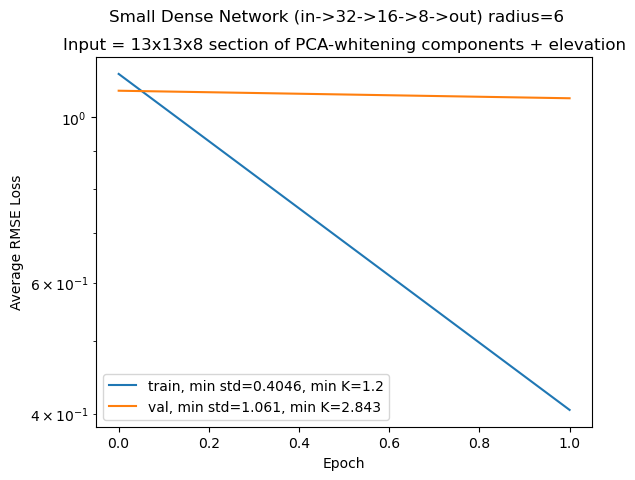

radius=10, n_components=2
 PatchToPixelModel(
  (linear1): Linear(in_features=1323, out_features=32, bias=True)
  (layernorm1): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
  (linear2): Linear(in_features=32, out_features=16, bias=True)
  (layernorm2): LayerNorm((16,), eps=1e-05, elementwise_affine=True)
  (linear3): Linear(in_features=16, out_features=8, bias=True)
  (layernorm3): LayerNorm((8,), eps=1e-05, elementwise_affine=True)
  (linear_output): Linear(in_features=8, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  1.0351,  3.0705   	 Val (RMSE, K):  1.0013,  2.6838   	LR:  0.001	Time: 69.9
Epoch 001:     Train (RMSE, K):  0.48523,  1.4393   	 Val (RMSE, K):  0.92674,  2.4841   	LR:  0.001	Time: 85.3


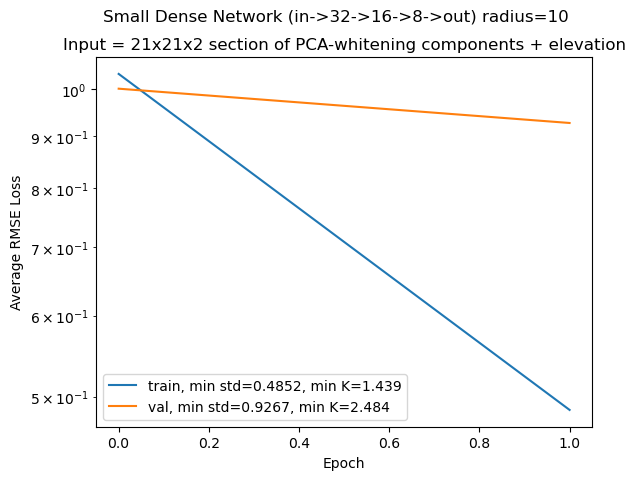

radius=10, n_components=4
 PatchToPixelModel(
  (linear1): Linear(in_features=2205, out_features=32, bias=True)
  (layernorm1): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
  (linear2): Linear(in_features=32, out_features=16, bias=True)
  (layernorm2): LayerNorm((16,), eps=1e-05, elementwise_affine=True)
  (linear3): Linear(in_features=16, out_features=8, bias=True)
  (layernorm3): LayerNorm((8,), eps=1e-05, elementwise_affine=True)
  (linear_output): Linear(in_features=8, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  0.98764,  2.9296   	 Val (RMSE, K):  1.0242,  2.7452   	LR:  0.001	Time: 82.1
Epoch 001:     Train (RMSE, K):  0.43987,  1.3048   	 Val (RMSE, K):  0.92138,  2.4697   	LR:  0.001	Time: 95.7


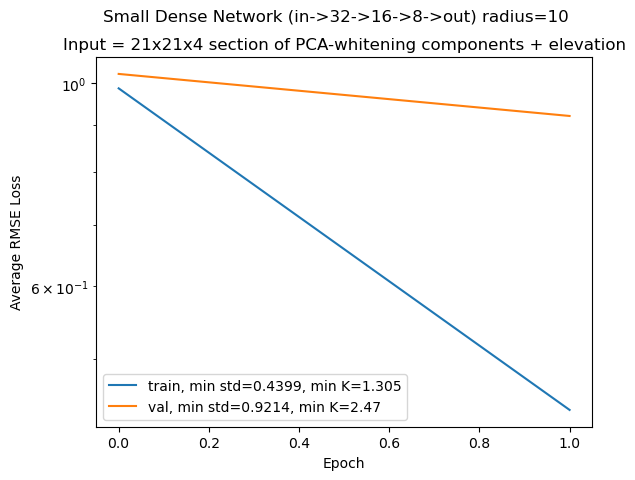

radius=10, n_components=8
 PatchToPixelModel(
  (linear1): Linear(in_features=3969, out_features=32, bias=True)
  (layernorm1): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
  (linear2): Linear(in_features=32, out_features=16, bias=True)
  (layernorm2): LayerNorm((16,), eps=1e-05, elementwise_affine=True)
  (linear3): Linear(in_features=16, out_features=8, bias=True)
  (layernorm3): LayerNorm((8,), eps=1e-05, elementwise_affine=True)
  (linear_output): Linear(in_features=8, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):   1.173,  3.4795   	 Val (RMSE, K):  1.0507,  2.8164   	LR:  0.001	Time: 1.53e+02
Epoch 001:     Train (RMSE, K):  0.37238,  1.1046   	 Val (RMSE, K):  0.87019,  2.3325   	LR:  0.001	Time: 1.7e+02


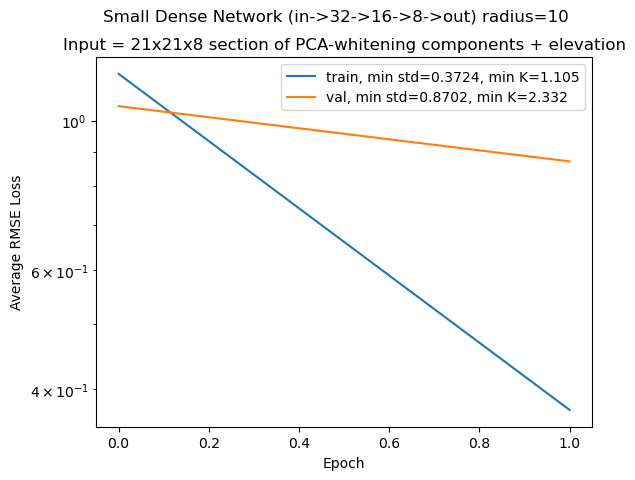

radius=12, n_components=2
 PatchToPixelModel(
  (linear1): Linear(in_features=1875, out_features=32, bias=True)
  (layernorm1): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
  (linear2): Linear(in_features=32, out_features=16, bias=True)
  (layernorm2): LayerNorm((16,), eps=1e-05, elementwise_affine=True)
  (linear3): Linear(in_features=16, out_features=8, bias=True)
  (layernorm3): LayerNorm((8,), eps=1e-05, elementwise_affine=True)
  (linear_output): Linear(in_features=8, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  1.4286,  4.2376   	 Val (RMSE, K):  1.1346,  3.0411   	LR:  0.001	Time: 83.2
Epoch 001:     Train (RMSE, K):  0.4916,  1.4582   	 Val (RMSE, K):  0.93234,  2.4991   	LR:  0.001	Time: 1.01e+02


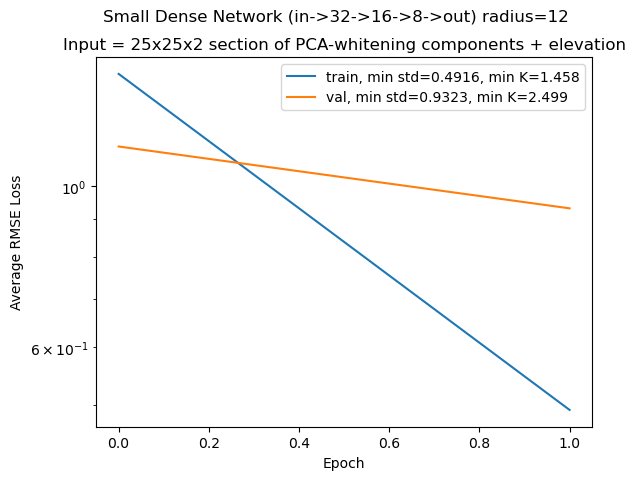

radius=12, n_components=3
 PatchToPixelModel(
  (linear1): Linear(in_features=2500, out_features=32, bias=True)
  (layernorm1): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
  (linear2): Linear(in_features=32, out_features=16, bias=True)
  (layernorm2): LayerNorm((16,), eps=1e-05, elementwise_affine=True)
  (linear3): Linear(in_features=16, out_features=8, bias=True)
  (layernorm3): LayerNorm((8,), eps=1e-05, elementwise_affine=True)
  (linear_output): Linear(in_features=8, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):   1.086,  3.2214   	 Val (RMSE, K):  0.97643,  2.6172   	LR:  0.001	Time: 89.3
Epoch 001:     Train (RMSE, K):  0.44821,  1.3295   	 Val (RMSE, K):  0.86373,  2.3152   	LR:  0.001	Time: 1.01e+02


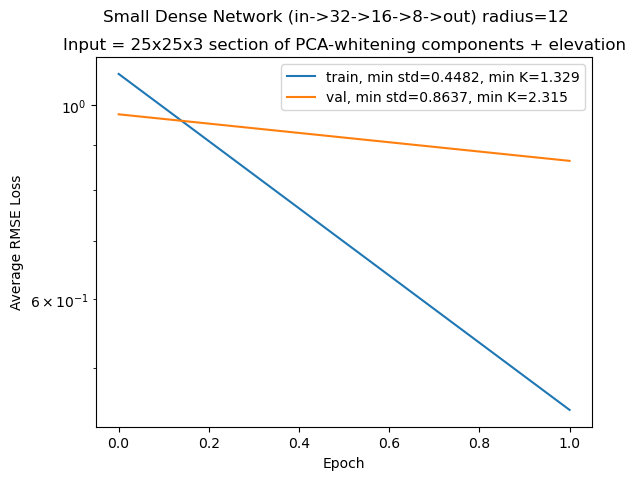

radius=12, n_components=6
 PatchToPixelModel(
  (linear1): Linear(in_features=4375, out_features=32, bias=True)
  (layernorm1): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
  (linear2): Linear(in_features=32, out_features=16, bias=True)
  (layernorm2): LayerNorm((16,), eps=1e-05, elementwise_affine=True)
  (linear3): Linear(in_features=16, out_features=8, bias=True)
  (layernorm3): LayerNorm((8,), eps=1e-05, elementwise_affine=True)
  (linear_output): Linear(in_features=8, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  1.2098,  3.5885   	 Val (RMSE, K):  1.3191,  3.5356   	LR:  0.001	Time: 1.8e+02
Epoch 001:     Train (RMSE, K):  0.40469,  1.2004   	 Val (RMSE, K):   1.723,  4.6184   	LR:  0.001	Time: 2.08e+02


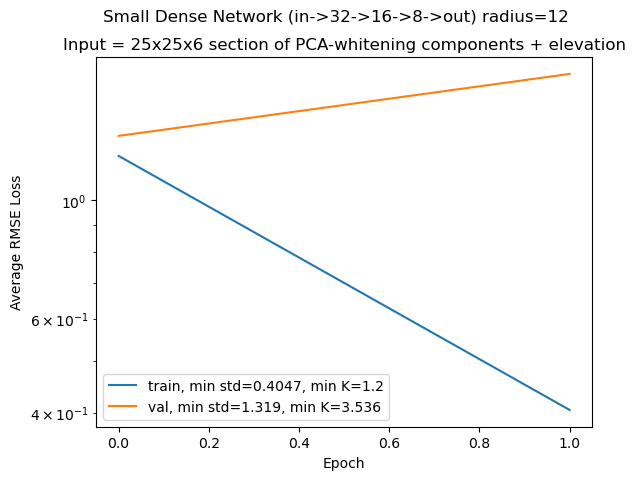

radius=14, n_components=3
 PatchToPixelModel(
  (linear1): Linear(in_features=3364, out_features=32, bias=True)
  (layernorm1): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
  (linear2): Linear(in_features=32, out_features=16, bias=True)
  (layernorm2): LayerNorm((16,), eps=1e-05, elementwise_affine=True)
  (linear3): Linear(in_features=16, out_features=8, bias=True)
  (layernorm3): LayerNorm((8,), eps=1e-05, elementwise_affine=True)
  (linear_output): Linear(in_features=8, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  1.3406,  3.9765   	 Val (RMSE, K):  1.1482,  3.0777   	LR:  0.001	Time: 1.06e+02
Epoch 001:     Train (RMSE, K):  0.45188,  1.3404   	 Val (RMSE, K):  1.4357,  3.8483   	LR:  0.001	Time: 1.21e+02


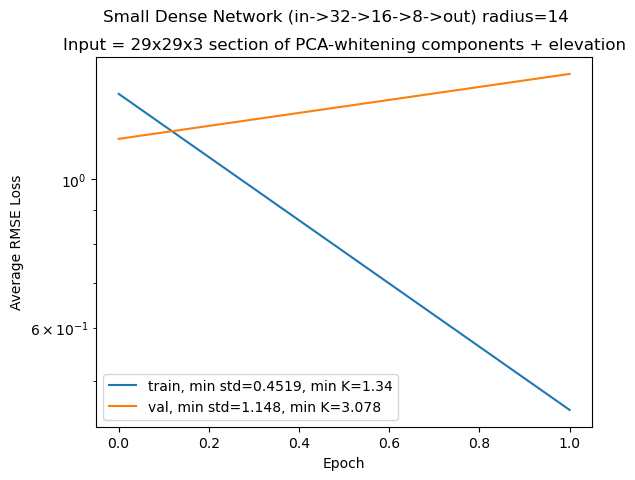

radius=16, n_components=2
 PatchToPixelModel(
  (linear1): Linear(in_features=3267, out_features=32, bias=True)
  (layernorm1): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
  (linear2): Linear(in_features=32, out_features=16, bias=True)
  (layernorm2): LayerNorm((16,), eps=1e-05, elementwise_affine=True)
  (linear3): Linear(in_features=16, out_features=8, bias=True)
  (layernorm3): LayerNorm((8,), eps=1e-05, elementwise_affine=True)
  (linear_output): Linear(in_features=8, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):   1.389,  4.1201   	 Val (RMSE, K):  1.1826,  3.1699   	LR:  0.001	Time: 1.27e+02
Epoch 001:     Train (RMSE, K):  0.49253,  1.4609   	 Val (RMSE, K):  0.90139,  2.4161   	LR:  0.001	Time: 1.43e+02


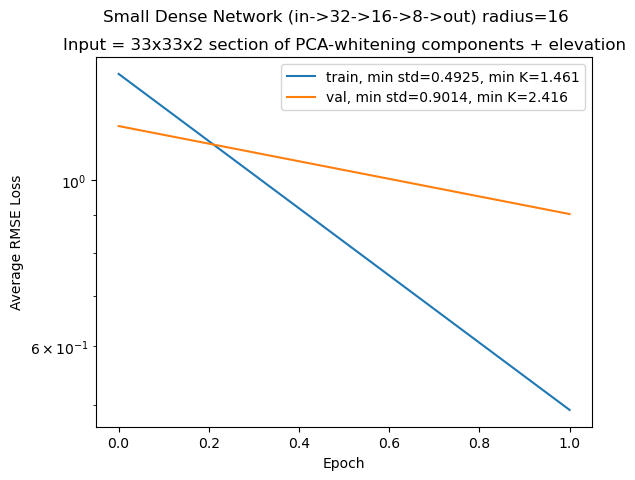

radius=16, n_components=3
 PatchToPixelModel(
  (linear1): Linear(in_features=4356, out_features=32, bias=True)
  (layernorm1): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
  (linear2): Linear(in_features=32, out_features=16, bias=True)
  (layernorm2): LayerNorm((16,), eps=1e-05, elementwise_affine=True)
  (linear3): Linear(in_features=16, out_features=8, bias=True)
  (layernorm3): LayerNorm((8,), eps=1e-05, elementwise_affine=True)
  (linear_output): Linear(in_features=8, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  0.93382,  2.7699   	 Val (RMSE, K):  1.0144,   2.719   	LR:  0.001	Time: 2.4e+02
Epoch 001:     Train (RMSE, K):  0.42778,  1.2689   	 Val (RMSE, K):  0.79103,  2.1203   	LR:  0.001	Time: 2.64e+02


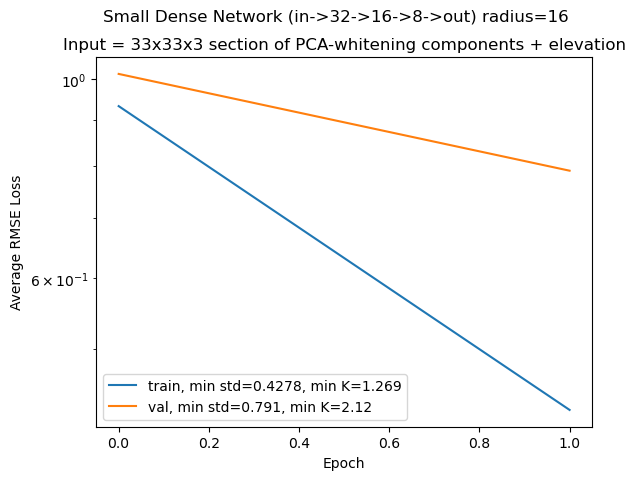

radius=16, n_components=4
 PatchToPixelModel(
  (linear1): Linear(in_features=5445, out_features=32, bias=True)
  (layernorm1): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
  (linear2): Linear(in_features=32, out_features=16, bias=True)
  (layernorm2): LayerNorm((16,), eps=1e-05, elementwise_affine=True)
  (linear3): Linear(in_features=16, out_features=8, bias=True)
  (layernorm3): LayerNorm((8,), eps=1e-05, elementwise_affine=True)
  (linear_output): Linear(in_features=8, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  1.0835,  3.2139   	 Val (RMSE, K):   1.101,   2.951   	LR:  0.001	Time: 2.41e+02
Epoch 001:     Train (RMSE, K):  0.42455,  1.2593   	 Val (RMSE, K):   1.222,  3.2754   	LR:  0.001	Time: 2.64e+02


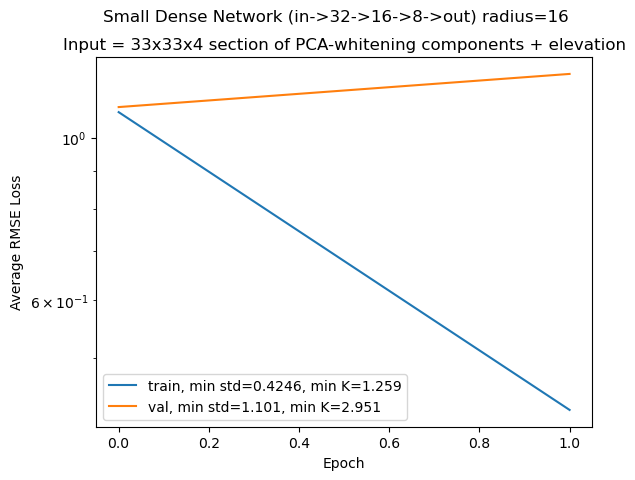

radius=18, n_components=3
 PatchToPixelModel(
  (linear1): Linear(in_features=5476, out_features=32, bias=True)
  (layernorm1): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
  (linear2): Linear(in_features=32, out_features=16, bias=True)
  (layernorm2): LayerNorm((16,), eps=1e-05, elementwise_affine=True)
  (linear3): Linear(in_features=16, out_features=8, bias=True)
  (layernorm3): LayerNorm((8,), eps=1e-05, elementwise_affine=True)
  (linear_output): Linear(in_features=8, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  1.1571,  3.4323   	 Val (RMSE, K):  1.0513,   2.818   	LR:  0.001	Time: 2.72e+02
Epoch 001:     Train (RMSE, K):  0.41576,  1.2332   	 Val (RMSE, K):   1.719,  4.6078   	LR:  0.001	Time: 2.91e+02


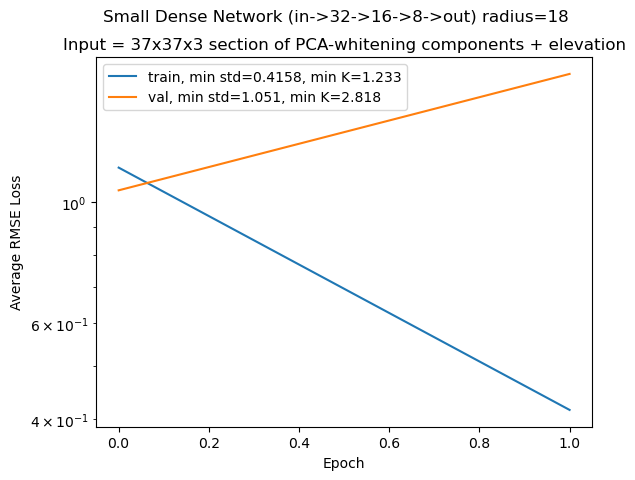

radius=18, n_components=5
 PatchToPixelModel(
  (linear1): Linear(in_features=8214, out_features=32, bias=True)
  (layernorm1): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
  (linear2): Linear(in_features=32, out_features=16, bias=True)
  (layernorm2): LayerNorm((16,), eps=1e-05, elementwise_affine=True)
  (linear3): Linear(in_features=16, out_features=8, bias=True)
  (layernorm3): LayerNorm((8,), eps=1e-05, elementwise_affine=True)
  (linear_output): Linear(in_features=8, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):   1.252,  3.7136   	 Val (RMSE, K):  1.0492,  2.8123   	LR:  0.001	Time: 2.84e+02
Epoch 001:     Train (RMSE, K):  0.40922,  1.2138   	 Val (RMSE, K):  1.2331,  3.3053   	LR:  0.001	Time: 3.07e+02


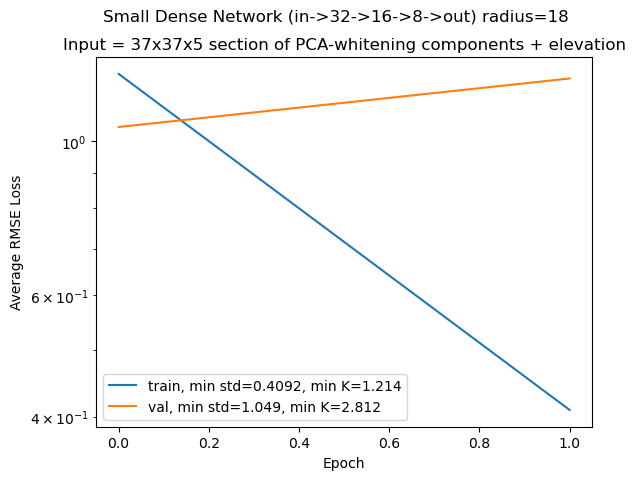

radius=20, n_components=2
 PatchToPixelModel(
  (linear1): Linear(in_features=5043, out_features=32, bias=True)
  (layernorm1): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
  (linear2): Linear(in_features=32, out_features=16, bias=True)
  (layernorm2): LayerNorm((16,), eps=1e-05, elementwise_affine=True)
  (linear3): Linear(in_features=16, out_features=8, bias=True)
  (layernorm3): LayerNorm((8,), eps=1e-05, elementwise_affine=True)
  (linear_output): Linear(in_features=8, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  1.0573,  3.1363   	 Val (RMSE, K):  0.91706,  2.4581   	LR:  0.001	Time: 3.16e+02
Epoch 001:     Train (RMSE, K):  0.44167,  1.3101   	 Val (RMSE, K):  0.85804,  2.2999   	LR:  0.001	Time: 3.33e+02


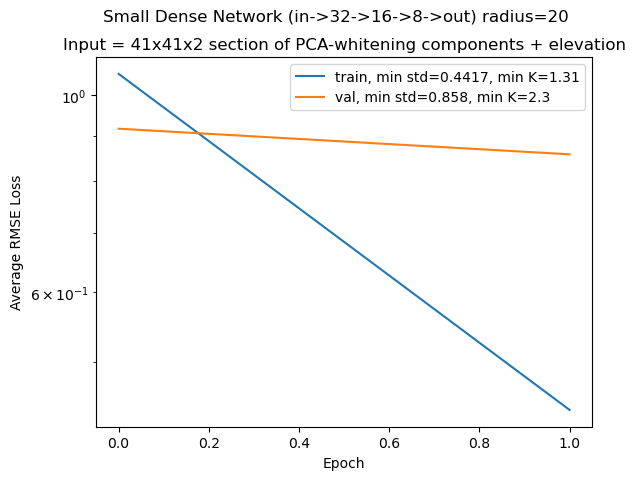

radius=22, n_components=2
 PatchToPixelModel(
  (linear1): Linear(in_features=6075, out_features=32, bias=True)
  (layernorm1): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
  (linear2): Linear(in_features=32, out_features=16, bias=True)
  (layernorm2): LayerNorm((16,), eps=1e-05, elementwise_affine=True)
  (linear3): Linear(in_features=16, out_features=8, bias=True)
  (layernorm3): LayerNorm((8,), eps=1e-05, elementwise_affine=True)
  (linear_output): Linear(in_features=8, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  1.1089,  3.2892   	 Val (RMSE, K):  0.99334,  2.6626   	LR:  0.001	Time: 3.61e+02
Epoch 001:     Train (RMSE, K):  0.46057,  1.3662   	 Val (RMSE, K):  1.0244,  2.7459   	LR:  0.001	Time: 3.85e+02


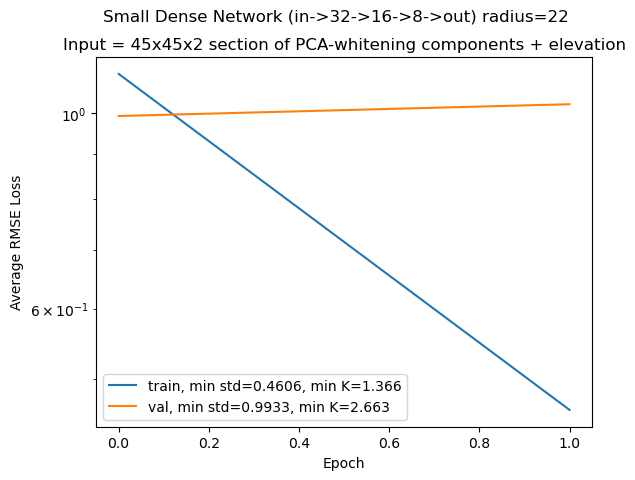

,radius,n_components,train_avg_std,train_std_std,train_std_min,train_std_0.5pct,train_std_2.5pct,train_std_16pct,train_std_25pct,train_std_50pct,...,val_K_0.5pct,val_K_2.5pct,val_K_16pct,val_K_25pct,val_K_50pct,val_K_75pct,val_K_84pct,val_K_97.5pct,val_K_99.5pct,val_K_max
0,6,4,0.447943,0.607927,4.768372e-07,0.002574,0.012609,0.081770,0.129126,0.276698,...,0.011076,0.053493,0.335243,0.528125,1.120882,1.987445,2.526356,4.548724,5.965158,9.357272
1,6,8,0.404642,0.605761,5.364418e-07,0.002078,0.010502,0.068104,0.107262,0.232084,...,0.016480,0.079557,0.518719,0.820234,1.756617,3.111876,3.885492,6.890146,8.757547,11.186521
2,10,2,0.485231,0.715017,8.344650e-07,0.002780,0.013537,0.087259,0.137254,0.291013,...,0.019970,0.102019,0.642462,1.002626,1.935506,2.908117,3.353613,5.248578,6.551039,9.081273
3,10,4,0.439870,0.626787,3.576279e-06,0.002474,0.012292,0.078032,0.123135,0.263756,...,0.015283,0.079060,0.492673,0.774350,1.630306,2.834490,3.466862,5.488360,7.445863,12.105615
4,10,8,0.372377,0.597385,9.536743e-07,0.001979,0.009761,0.061613,0.097344,0.209285,...,0.013886,0.070513,0.449764,0.706978,1.485553,2.566182,3.179365,5.572157,7.208312,10.960204
5,12,2,0.491604,0.725357,3.725290e-07,0.002759,0.013513,0.086381,0.137071,0.291542,...,0.018630,0.094507,0.618016,0.970372,1.887046,2.867876,3.400199,5.391491,6.765921,10.759503
6,12,3,0.448207,0.667333,1.519918e-06,0.002491,0.012235,0.078916,0.124438,0.265975,...,0.013235,0.067124,0.447569,0.704577,1.505051,2.591394,3.175288,5.348241,7.406462,10.012377
7,12,6,0.404694,0.606277,1.192093e-07,0.002101,0.010819,0.068875,0.108571,0.234478,...,0.028459,0.147917,0.948837,1.523305,3.537245,6.093633,6.922095,8.466133,9.136888,11.349141
8,14,3,0.451879,0.674945,1.192093e-06,0.002442,0.012363,0.080222,0.126413,0.270087,...,0.030099,0.149073,0.968241,1.526314,3.153568,4.944011,5.629663,6.953980,7.743019,10.491202
9,16,2,0.492527,0.728154,3.159046e-06,0.002767,0.013424,0.086207,0.136314,0.290202,...,0.021870,0.108517,0.676043,1.033081,1.875494,2.811351,3.353987,5.021164,6.037856,10.678591


In [16]:
importlib.reload(datasets.Datasets)
importlib.reload(models.Feedforward)
importlib.reload(utils.train)
importlib.reload(utils.eval)

batch_size = 256
val_batch_size = 1024

n_epochs = 1
dropout_rate = 0

stats_list = []
train_loss_array_list = []
val_loss_array_list = []
train_loss_list = []
val_loss_list = []

stats = None
print('Start Training', file=open(log_file_path, 'w'))
try:
    for combo in benchmark_combos:
        radius, n = combo

        omit_components = 244 - n

        # create datasets and dataloaders

        train_dataset = datasets.Datasets.PatchToPixelDataset(
            emit_data=emit_train,
            omit_components=omit_components,
            ecostress_data=eco_train,
            ecostress_center=None,
            ecostress_scale=None,
            additional_data=(elev_train,),
            radius=radius,
            boundary_width=max(
                [benchmark_combos[i][0] for i in range(len(benchmark_combos))]
            ),
        )

        val_dataset = datasets.Datasets.PatchToPixelDataset(
            emit_data=emit_val,
            omit_components=omit_components,
            ecostress_data=eco_val,
            ecostress_center=None,
            ecostress_scale=None,
            additional_data=(elev_val,),
            radius=radius,
            boundary_width=max(
                [benchmark_combos[i][0] for i in range(len(benchmark_combos))]
            ),
        )

        if batch_size is not None:
            train_loader = DataLoader(
                dataset=train_dataset,
                batch_size=batch_size,
                drop_last=False,
                shuffle=True,
            )
            val_loader = DataLoader(
                dataset=val_dataset,
                batch_size=val_batch_size,
                drop_last=False,
                shuffle=False,
            )
        else:
            train_loader = DataLoader(
                dataset=train_dataset, batch_size=batch_size, shuffle=True,
            )
            val_loader = DataLoader(
                dataset=val_dataset, batch_size=batch_size, shuffle=False,
            )
            
        
        model = models.Feedforward.PatchToPixelModel(
            input_dim=train_dataset.input_dim,
            radius=radius,
            dropout_rate=dropout_rate,
        )
        
        if device == 'cuda':
            model = model.cuda()

        optimizer = optim.Adam(
            params=model.parameters(), lr=0.001, weight_decay=0, fused=True
        )

        scheduler = optim.lr_scheduler.ReduceLROnPlateau(
            optimizer=optimizer, factor=0.2, patience=2
        )

        loss_fn = nn.MSELoss(reduction='sum')

        print(f'radius={combo[0]}, n_components={combo[1]}\n', model)
        print(
            f'radius={combo[0]}, n_components={combo[1]}\n',
            model,
            file=open(log_file_path, 'a'),
        )
        
        train_loss, val_loss, eval_stats, train_loss_array, val_loss_array = (
            utils.train.train(
                model,
                optimizer,
                scheduler,
                loss_fn,
                train_loader,
                val_loader,
                n_epochs=n_epochs,
                loss_interval=1,
                # preexisting_losses=[train_loss, val_loss],
                device=device,
                log_file_path=log_file_path,
            )
        )
        
        eval_stats = np.concatenate([np.array(combo), eval_stats])
        stats_list.append(eval_stats)
        train_loss_array_list.append(train_loss_array)
        val_loss_array_list.append(val_loss_array)
        train_loss_list.append(train_loss)
        val_loss_array_list.append(val_loss)
        
        
        fig, ax = plt.subplots()
        fig.suptitle(
            f'Small Dense Network (in->32->16->8->out) radius={radius}'
        )
        l = 2 * radius + 1
        ax.set_title(
            f'Input = {l}x{l}x{244 - omit_components} section of '
            'PCA-whitening components + elevation'
        )
        ax.semilogy(
            np.arange(len(train_loss)),
            train_loss,
            label=(
                'train, '
                f'min std={min(train_loss):.4}, '
                f'min K={train_dataset.ecostress_scale * min(train_loss):.4}'
            ),
        )
        ax.semilogy(
            np.arange(len(val_loss)),
            val_loss,
            label=(
                'val, '
                f'min std={min(val_loss):.4}, '
                f'min K={val_dataset.ecostress_scale * min(val_loss):.4}'
            ),
        )
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Average RMSE Loss')
        ax.legend()
        plt.show(fig)
        
        torch.save(
            model.state_dict(),
            join_path(f'Data\\Models\\linear_r{radius}_n{n}.pt')
        )
        
    stats = np.array(stats_list)
    stats_columns = utils.eval.initialize_eval_results().columns.to_list()
    stats = pd.DataFrame(stats, columns=stats_columns)
    stats['radius'] = stats['radius'].astype(int)
    stats['n_components'] = stats['n_components'].astype(int)
        
except KeyboardInterrupt:
    print('Training was interrupted by user')
    print('Training was interrupted by user', file=open(log_file_path, 'a'))

stats

In [17]:
stats.to_csv(join_path(r'Miscellaneous\linear_benchmarking_pca_temp.csv'))

In [20]:
stats.iloc[:,35].min()

0.4181733655540602

In [19]:
stats.columns

Index(['radius', 'n_components', 'train_avg_std', 'train_std_std',
       'train_std_min', 'train_std_0.5pct', 'train_std_2.5pct',
       'train_std_16pct', 'train_std_25pct', 'train_std_50pct',
       'train_std_75pct', 'train_std_84pct', 'train_std_97.5pct',
       'train_std_99.5pct', 'train_std_max', 'train_avg_K', 'train_std_K',
       'train_K_min', 'train_K_0.5pct', 'train_K_2.5pct', 'train_K_16pct',
       'train_K_25pct', 'train_K_50pct', 'train_K_75pct', 'train_K_84pct',
       'train_K_97.5pct', 'train_K_99.5pct', 'train_K_max', 'val_avg_std',
       'val_std_std', 'val_std_min', 'val_std_0.5pct', 'val_std_2.5pct',
       'val_std_16pct', 'val_std_25pct', 'val_std_50pct', 'val_std_75pct',
       'val_std_84pct', 'val_std_97.5pct', 'val_std_99.5pct', 'val_std_max',
       'val_avg_K', 'val_std_K', 'val_K_min', 'val_K_0.5pct', 'val_K_2.5pct',
       'val_K_16pct', 'val_K_25pct', 'val_K_50pct', 'val_K_75pct',
       'val_K_84pct', 'val_K_97.5pct', 'val_K_99.5pct', 'val_K_max'],

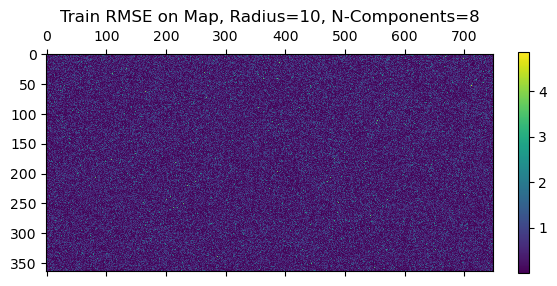

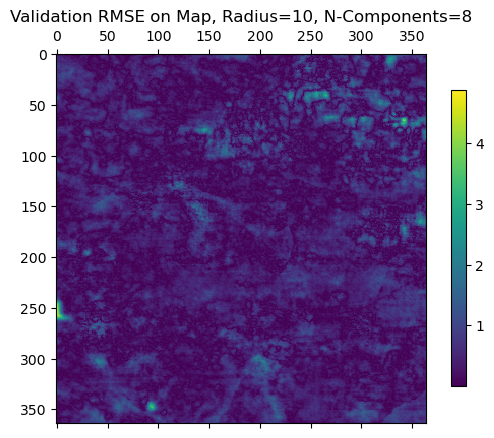

In [25]:
fig, ax = plt.subplots()
ax.set_title('Train RMSE on Map, Radius=10, N-Components=8')
plt.imshow(train_loss_array)
plt.colorbar(fraction=0.05, shrink=0.6)
ax.matshow(train_loss_array)
plt.show(fig)
fig, ax = plt.subplots()
ax.set_title('Validation RMSE on Map, Radius=10, N-Components=8')
plt.imshow(train_loss_array)
plt.colorbar(fraction=0.05, shrink=0.8)
ax.matshow(val_loss_array)
plt.show(fig)

In [ ]:
n_components_benchmark_radii = [0]
#[0, 1, 3, 8, 16]
n_components_benchmark_n_components = [1, 2, 3, 4, 5, 8, 10, 12, 16,]
#[1, 2, 3, 4, 8, 16, 32, 64, 128, 244]

radius_benchmark_radii = []#[0, 1, 2, 3, 4, 8, 16]
radius_benchmark_n_components = []#[8, 16, 32, 64, 244]

benchmark_combos = []
for radius in n_components_benchmark_radii:
    for n in n_components_benchmark_n_components:
        benchmark_combos.append((radius, n))

for radius in radius_benchmark_radii:
    for n in radius_benchmark_n_components:
        if (radius, n) in benchmark_combos:
            continue
        else:
            benchmark_combos.append((radius, n))

len(benchmark_combos)

1